# Standardization

In [370]:
import pandas as pd
import numpy as np
import seaborn as sns


In [371]:
df = pd.read_csv("datasets/social_ads.csv")

In [372]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [373]:
df.shape

(400, 3)

In [374]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [375]:
print(df.duplicated().sum())
print(df[df.duplicated()])

33
     Age  EstimatedSalary  Purchased
23    45            22000          1
54    27            58000          0
74    32            18000          0
86    24            55000          0
94    29            83000          0
138   28            59000          0
150   26            15000          0
186   20            82000          0
192   29            43000          0
195   34            43000          0
198   26            80000          0
231   39            42000          0
236   40            57000          0
246   35            50000          0
256   41            72000          0
257   40            57000          0
263   35            72000          0
266   40            75000          0
290   39           134000          1
312   38            50000          0
322   41            52000          0
326   41            72000          0
332   42            65000          0
341   35            75000          0
349   38            61000          0
357   41            72000          

In [376]:
df = df.drop_duplicates()


1. StandardScaler

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [378]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Purchased", axis=1),df["Purchased"], test_size=0.25,random_state=22)

In [379]:
print(X_train.shape, X_test.shape)

(275, 2) (92, 2)


In [380]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [381]:
scaler.mean_

array([3.74981818e+01, 7.04945455e+04])

In [382]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [383]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,275.0,275.0
mean,37.5,70494.5
std,10.4,35158.6
min,18.0,15000.0
25%,29.0,43000.0
50%,37.0,71000.0
75%,46.0,88500.0
max,60.0,150000.0


In [384]:
np.round(X_train_scaled.describe(),1)


,Age,EstimatedSalary
count,275.0,275.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,0.0
75%,0.8,0.5
max,2.2,2.3


In [385]:
import matplotlib.pyplot as plt

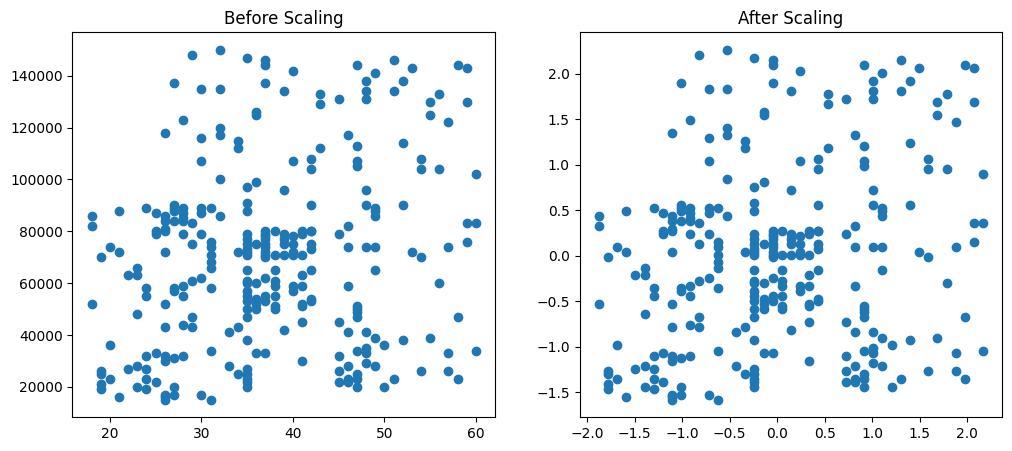

In [386]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1);plt.title("Before Scaling"); plt.scatter(X_train["Age"],X_train["EstimatedSalary"])
plt.subplot(1,2,2);plt.title("After Scaling"); plt.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])

In [387]:
from sklearn.linear_model import LogisticRegression

In [388]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [389]:
lr.fit(X_train, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [390]:
lr_scaled.fit(X_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [391]:
y_predict = lr.predict(X_test)
y_predict_scaled = lr_scaled.predict(X_test_scaled)

In [392]:
from sklearn.metrics import accuracy_score

In [393]:
print("Actual", accuracy_score(Y_test,y_predict))
print("Scaled", accuracy_score(Y_test,y_predict_scaled))

Actual 0.8586956521739131
Scaled 0.8586956521739131


# Normalization

In [397]:
from sklearn.preprocessing import MinMaxScaler


In [398]:
scaler =  MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [400]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [401]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,37.7,69900.0
std,10.2,34290.9
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,45.0,88000.0
max,60.0,150000.0


In [402]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.6,0.5
max,1.0,1.0


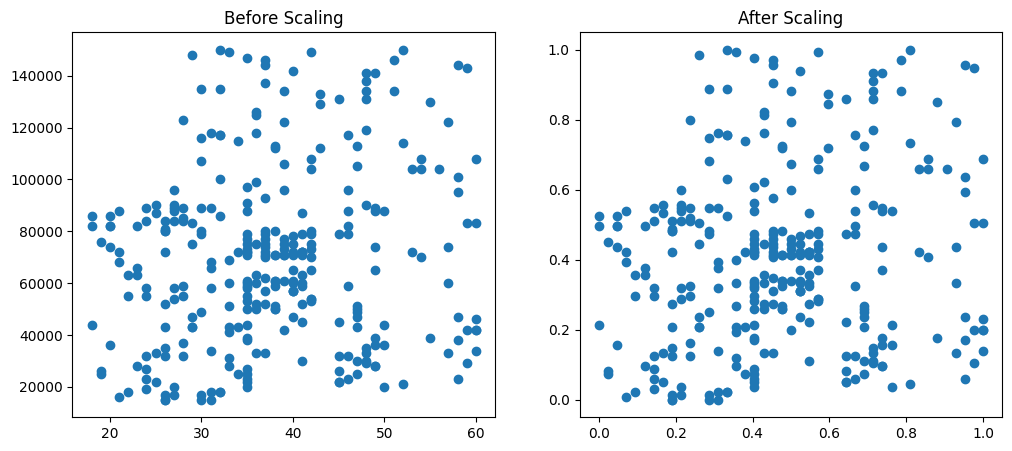

In [403]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1);plt.title("Before Scaling"); plt.scatter(X_train["Age"],X_train["EstimatedSalary"])
plt.subplot(1,2,2);plt.title("After Scaling"); plt.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])